In [7]:
# 02 — Baseline Logistic Regression (Probability-First)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score

df = pd.read_csv("creditcard.csv")
cols = list(df.columns)

label_col = "Class" if "Class" in cols else "class"
df[label_col] = pd.to_numeric(df[label_col], errors="coerce").fillna(0).astype(int)

X = df.drop(columns=[label_col])
y = df[label_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train fraud rate:", y_train.mean())
print("Test  fraud rate:", y_test.mean())

Train fraud rate: 0.001729245759178389
Test  fraud rate: 0.0017204452090867595


In [9]:
# Baseline model (scaled logistic) — probability-first
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)
proba = pipe.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, proba)
roc_auc = roc_auc_score(y_test, proba)

print(f"Baseline PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"Baseline ROC-AUC: {roc_auc:.4f}")

Baseline PR-AUC (Average Precision): 0.7190
Baseline ROC-AUC: 0.9721


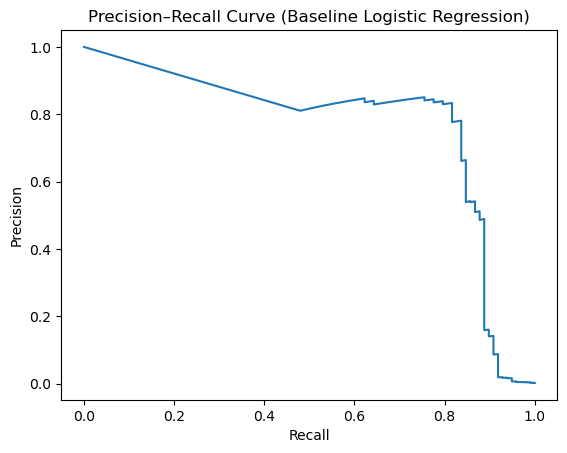

In [11]:
# PR curve
precision, recall, _ = precision_recall_curve(y_test, proba)

plt.figure()
plt.plot(recall, precision)
plt.title("Precision–Recall Curve (Baseline Logistic Regression)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [13]:
print("""
Purpose of the baseline model:
- establish a probability baseline
- validate that PR-AUC is the right metric under extreme imbalance
- provide a reference point for tree-based models (XGBoost)
""")


Purpose of the baseline model:
- establish a probability baseline
- validate that PR-AUC is the right metric under extreme imbalance
- provide a reference point for tree-based models (XGBoost)

